In [1]:
# These are helpful routines that will assist in building this book. 
# You should run this block before anything else. There is no output expected.
from astrodynamicsbook.bookhelpers import *
loadLatexPreamble()

# This is only here to create the navigation link:
genPrevLink()

$
\def\bs{\boldsymbol}
\def\mf{\mathbf}
\def\mb{\mathbb}
\def\mc{\mathcal}
\def\rfr{\mathcal}
\def\grad{{\rm grad}}
\def\Re{{\rm Re}}
\def\Im{{\rm Im}}
\def\und{\underline}
\def\ovl{\overline}
\def\unb{\underbrace}
\def\Log{\mbox{Log}}
\def\bfomega{\bs \omega}
\def\bfalpha{\bs \alpha}
\def\da{\triangleq}
\newcommand{\leftexp}[2]{{\vphantom{#2}}^{#1}\!{#2}}
\newcommand{\leftsub}[2]{{\vphantom{#2}}_{#1}\!{#2}}
\newcommand{\omegarot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\omega}}^{\mathcal{#2}}}}
\newcommand{\alpharot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\alpha}}^{\mathcal{#2}}}}
\newcommand{\framerot}[2]{{\leftexp{\mathcal{#1}}{C}^{\mathcal{#2}}}}
\newcommand{\dframerot}[2]{{\vphantom{\dot{C}}^{\mathcal{#1}}\!{\dot{C}^{\mathcal{#2}}}}}
\newcommand{\bdot}[1]{\dot{\mathbf{#1}}}
\newcommand{\bhat}[1]{\hat{\mathbf{#1}}}
\newcommand{\mbhat}[1]{\hat{\mathbb{#1}}}
\def\iwb{\omegarot{I}{B}}
\def\iab{\alpharot{I}{B}}
\def\icb{\framerot{I}{B}}
\def\dif{\mathop{}\!\mathrm{d}}
\newcommand{\intd}[1]{\dif#1}
\newcommand{\od}[3][]{{ \frac{\dif{^{#1}}#2}{\dif{#3^{#1}}} }}			
\newcommand{\pd}[3][]{{ \frac{\partial{^{#1}}#2}{\partial{#3^{#1}}} }}	 
\newcommand{\md}[6]{{  \frac{\partial{^{#2}}#1}{\partial{#3^{#4}}\partial{#5^{#6}}} }}
\newcommand{\fddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{#1}}{\dif{t}}}  }}
\newcommand{\fdddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{^{2}#1}}{\dif{t^2}}}  }}
\newcommand{\ddt}[1][]{\fddt[#1]{I}}
$


# [Previous](<14-Keplers Laws Continued.ipynb>)

# It's About Time

While we've been busy patting ourselves on our collective backs about how *neat* everything about the two-body problem and its solution works out to be, it is possible that we've...missed something.  Let's review.  We have established that the orbital radius of the two-body system is given for all time by:
$$r = \frac{\ell}{1+ e \cos{\left(\nu \right)} }$$
where $\ell$ and $e$ are constants.  $\nu$, however, is a time-varying quantity (the only one in this expression) and we have already established it's rate of change, which is given by $\dot \nu = h r^{-2}$.

When dealing with actual orbits, we wish to know where things are at specific times, and so presumably our next step is to rewrite our orbital radius expression explicitly as a function of time. Except, we *can't*. The problem lies in that $\dot\nu$ expression. In order to express $\nu$ as a function of time, we would need to integrate this expression, which is a function of $r$, which is a function of $\nu$.  You cannot write a closed form solution of this integral, and thus you cannot write an algebraic solution for the orbital radius as a function of time.

<div class="alert alert-block alert-danger">
    Well, actually, that's a total lie.  You <i>can</i> write down a solution to this problem, but it will take the form of an infinite series (more on this soon).  It somewhat depends on how you define 'closed-form'.  If we wished to be precise (and you know that we do), we would rather say that no solution exists requiring a finite number of algebraic operations. 
    </div>

Let's see what sympy thinks about this:

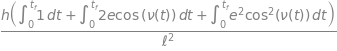

In [2]:
# Let's ask sympy to integrate something we know to be non-integrable
h,l,e,t,tf = symbols("h,ell,e,t,t_f")
nu = Function('nu')(t) # we'll define nu as a function of t
r = l/(1 + e*cos(nu))
dnu = h/r**2
sympy.integrate(dnu,(t,0,tf))

If sympy says it can't be done, then it's time to give up, right?  Well, maybe not.  Let's dip back into Kepler's geometric genius and see what else can be said about this problem.

# Eccentric Anomaly

Remember how circles are easy and boring? On a circular orbit, orbital speed and orbital radius are both constant, and the true anomaly changes linearly in time.  How can we leverage this for the analysis of elliptical orbits?  

<p style="text-align:center;"><img src="img/aux_circle_orbit_diagram.png" alt="Auxiliary Circle" width="800" id="fig:aux_circ"/></p>

We start by circumscribing our elliptical orbit with a circular one whose radius is equal to the ellipse's semi-major axis.  This is known as the **auxiliary circle**.  Recall that we have [already proven](<4-Keplers Laws Continued.ipynb#Kepler's-Third-Law>) that the orbital periods of any two orbits with the same semi-major axes are identical, regardless of their eccentricities.  This means that a body following the elliptical orbit and the auxiliary circle orbit will have the same period and will hit periapsis and apoapsis at the same times. At all other times, however, locations on the two orbits will diverge.

We will next define the **eccentric anomaly** ($E$) as the angle between the major axis (eccentricity vector direction) and the line joining the geometric center ($C$) of our orbit with a point $A$, which is located on the auxiliary circle on the chord orthogonal to the major axis and passing through the body's position ($P$) on the elliptical orbit for some true anomaly ($\nu$). 

Consider the right triangle $\angle CAD$ where $D$ is the intersection of the chord described above with the major axis.  The hypotenuse of this triangle is the segment $\overline{CA}$ (which has a length equal to the auxiliary circle's radius, which is the ellipse's semi-major axis, $a$).  The base of the triangle is segment $\overline{CD}$, which can be split into segments $\overline{CF}$ and $\overline{FD}$.  The former has a length equal to the linear eccentricity ($ae$), while the latter is the base of another right triangle: $\angle FPD$. The hypotenuse of $FPD$ is the orbital radius magnitude ($r$), and since the true anomaly is the angle between the major axis and the orbital radius vector, we can write: $\overline{FD} = r\cos(\nu)$. 

Returning to $\angle CAD$, we thus have:
$$a\cos(E) = ae + r\cos(\nu) \quad \Longrightarrow \quad \cos(E) = \frac{ae + r\cos(\nu)}{a}$$

While this is a useful expression, it has one drawback: the range of arccosine is only $[0,\pi]$, whereas both $E$ and $\nu$ are well-defined in all four quadrants.  In order to have a completely general relationship between these two angles, we require an inversion with support over their full ranges. The typical approach in such cases is to find an expression for the sine of the angle in question, which allows for the use of a two-argument arctangent function, whose range covers the full plane.

Let's substitute the equation for $r$ for an ellipse into the above expression to get a form of $\cos(E)$ as a function of $e$ and $\nu$ only:

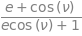

In [3]:
a,e,nu = symbols("a,e,nu", real=True, positive=True)
r = a*(1-e**2)/(1+e*cos(nu))
cosE = simplify((a*e + r*cos(nu))/a)
cosE

We can compute $\sin(E)$ as $\sqrt{1 - \cos(E)^2}$, but this is not an independent expression and so would not be hugely helpful in a two-argument arctangent function (primarily because we do not know whether to use the positive or negative value of the square root for a given set of angles). An alternative trick we can play, however, is to use half-angle relationship to remap our angles to their full ranges. In particular, we will utilize the half-angle tangent relationships:
$$\tan\left(\frac{\theta}{2}\right) = \frac{\sin(\theta)}{1 + \cos(\theta)} = \frac{1 - \cos(\theta)}{\sin(\theta)}$$

<div class="alert alert-block alert-danger">
    Trigonometric identities like this one are insanely useful and important.  They should be a basic part of your mathematical toolbox - to be reached for as frequently as you use a hammer (assuming you use a hammer frequently). There's no particular reason to memorize any of them - just know that they are always at your disposal.
    </div>


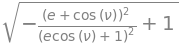

In [4]:
# Calculate sin(E) from the cos(E) expression
sinE = sqrt(1 - cosE**2)
sinE

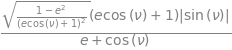

In [5]:
# Calculate tan(E)
tanE = simplify(sinE/cosE)
tanE

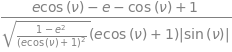

In [6]:
# Calculate tan(E/2) from the trigonometric identity
tanE2 = (1-cosE)/sinE
simplify(tanE2)

Ugh.  This is going to be one of those times that sympy is intransigent in simplification.  It's actually doing everything correctly, and refusing to discard negative roots of various square roots, but we know that we can help it along.  Clearing the cruft, what we now have is:
$$\tan\left(\frac{E}{2}\right) = \frac{(1-e)(1-\cos(\nu))}{\sqrt{1 - e^2}\sin(\nu)} = \frac{\sqrt{1+e}}{\sqrt{1-e}}\frac{1-\cos(\nu)}{\sin(\nu)}$$

Again applying the half-angle tangent formula, we find:

<div class="alert alert-block alert-info">
    $$\tan\left(\frac{E}{2}\right) = \frac{\sqrt{1-e}}{\sqrt{1+e}}\tan\left(\frac{\nu}{2}\right)$$
    </div>
which also gives us the inverse relationship simply by dividing by the square root term on the right-hand side.


The assertion here is that this half-angle form will correctly transform the angles over the full range of $\nu$ values, whereas the $\tan(E)$ expression will not.  Let's check this.  First, however, let's dial in some expectations: From Kepler's second law, we know that our orbiting body will be traveling the fastest near periapsis and slowest near apoapsis.  On the auxiliary circle, however, any point will be traveling at a constant rate.  Thus, we expect true anomaly to outpace eccentric anomaly near perapsis, then fall behind as we approach apoapsis, for the value to match exactly at apoapsis, and then for the pattern to repeat in reverse. Ok, now that we know what we're looking for, let's see if it works:

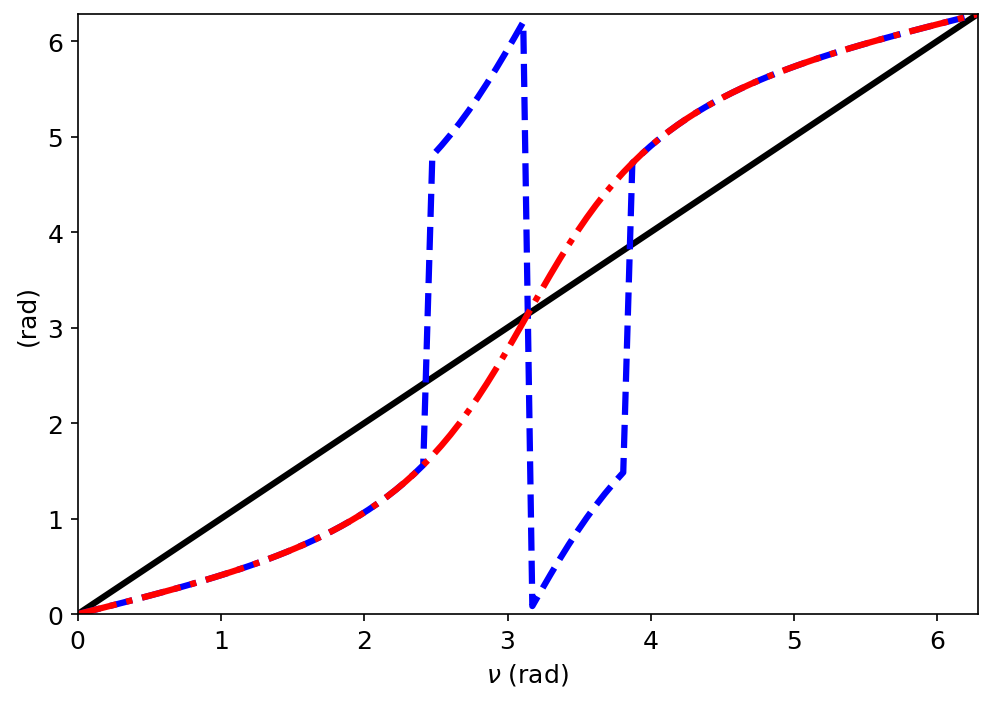

In [7]:
# More plotting!
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])

# pick a value for e and sample values of nu uniformly over its full range
e1 = 0.75 # we pick a fairly large e to accentuate various effects
#note use of np.pi rather than pi, which is a sympy variable
nu1 = np.linspace(0,2*np.pi,100) 

# we expect this to not work for nu outside of -pi/2,pi/2:
E1 = np.mod(np.arctan(np.sqrt(1 - e1**2)*np.sin(nu1)/(e1 + np.cos(nu1))),2*np.pi)
# we expect this to work much better:
E2 = np.mod(2*np.arctan(np.sqrt(1-e1)/np.sqrt(1+e1)*np.tan(nu1/2)),2*np.pi)

ax.plot(nu1,nu1,'k',nu1,E1,'b--',nu1,E2,'r-.',linewidth=3) 
ax.set_xlim([0,2*np.pi])
ax.set_ylim([0,2*np.pi])
ax.set_xlabel('$\\nu$ (rad)');
ax.set_ylabel('(rad)');

The black curve shows $\nu$ plotted against itself (i.e., the line with slope equal to 1) while the blue (dashed) and red (dash-dotted) curves show our two computations of $E$, using the inverse of the pure arctangent relationship and the inverse of the half-arctangent relationship, respectively.  As expected, the pure tangent formula fails when $\nu$ is in the right-hand plane, whereas the half-angle expression behaves well everywhere.  The curves also match our physical expectations of this system: $E$ initially trails $\nu$, then catches up at apoapsis, then leads up until they meet back at periapsis again. 

One final thing about the code above: note the use of the `np.mod` method.  This is numpy's modulo operator. When passed with second argument $2\pi$, it automatically maps whatever's in the first argument to $[0,2\pi)$, which is exactly what we want from angles in a closed orbit.  While trigonometric operators do not care about phase wrapping, some of the numerical techniques we explore later will, and so it is good practice to always force angle of a closed orbit into some preferred range.

<div class="alert alert-block alert-danger">
    The strong caveat here is that this is explicitly <i>incorrect</i> for open orbits.  The range of true anomalies for an open orbit is strictly $(-\dfrac{\pi}{2},\dfrac{\pi}{2})$ and re-mapping to $[0,2\pi)$ will lead to erroneous results.  Open orbits are not periodic, and it is crucially important to keep track of whether an orbiting body is pre- or post-periapsis passage. 
    </div>

# Kepler's Time Equation

Returning to our derivation of the eccentric anomaly and its relationship with the true anomaly, note that as an intermediate step, we found that:
$$\cos(E) = \frac{e + \cos{\left(\nu \right)}}{e \cos{\left(\nu \right)} + 1}$$
which we can use to solve for $\cos(\nu)$:

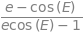

In [8]:
E = symbols("E", real=True, positive=True)
cosnu = sympy.solve(cosE-cos(E),cos(nu))[0]
cosnu

We now substitute this into our orbital radius equation for an ellipse, scaled by the semi-major axis, to find:

In [9]:
ra1 = r/a # r/a as function of nu
ra2 = simplify(ra1.subs(cos(nu),cosnu)) # r/a as function of E
ra2

Cool, huh? We have:
$$\frac{r}{a} = \frac{1 - e^2}{1+e\cos\nu} = 1 - e\cos(E)$$

Let's differentiate both versions of this expression with respect to time and see what happens:

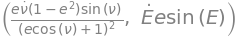

In [10]:
nud,Ed = symbols("nudot,Edot",real=True)
diffmap = {nu:nud, E:Ed}
dra1 = difftotal(ra1,t,diffmap)
dra2 = difftotal(ra2,t,diffmap)
dra1,dra2

We can clean up the $\nu$ derivative by substituting back our expression for $r/a$ and recalling that $r^2\dot\nu = h$:

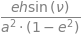

In [11]:
r,mu = symbols('r,mu',real=True)
dra1 = ((dra1/ra1**2)*r**2/a**2).subs(r**2*nud,h)
dra1

We have established several times now that $h^2/\mu = \ell$ and so, for an ellipse, $h = \sqrt{\mu a (1 - e^2)}$:

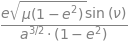

In [12]:
dra1 = dra1.subs(h,sqrt(mu*a*(1-e**2)))
dra1

Returning momentarily to our expression for $\cos(\nu)$ as a function of $E$, we can again find $\sin(\nu)$ as $\sqrt{1 - \cos^2(\nu)}$:

$$\sin\nu = \sqrt{1 - \left(\frac{e - \cos{\left(E \right)}}{e \cos{\left(E \right)} - 1}\right)^2} = \frac{\sqrt{1 - e^2}}{1 - e\cos(E)}\sin(E)$$

Substituting back into our derivative of $r/a$:

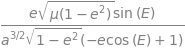

In [13]:
dra1 = dra1.subs(sin(nu),sqrt(1 - e**2)/(1 - e*cos(E))*sin(E))
dra1

Let's regroup.  What we've shown so far is:

$$ \fddt{}\left( \frac{r}{a}\right) = \dot E e \sin(E) = \sqrt{\frac{\mu}{a^3}}\frac{e  \sin{\left(E \right)}}{ 1 - e \cos{\left(E \right)} } $$

That leading square root term on the right hand side looks awfully familiar.  In fact, it popped up during our derivation of [Kepler's third law](<4-Keplers Laws Continued.ipynb#Kepler's-Third-Law>).  We define it as:

<div class="alert alert-block alert-info">
    The <b>mean motion</b>:
    $$n \triangleq  \sqrt{\frac{\mu}{a^3}} \equiv \frac{2\pi}{T_P}$$
    </div>

The mean motion is the *average* angular rate of motion of a body on its orbit (covering a full 2$\pi$ radians in one orbital period, $T_P$).

Now cancelling the $e\sin(E)$ terms on either side of our equation, we have:
$$ \frac{\intd{E}}{\intd{t}} = \frac{n}{1 - e\cos(E)} \quad \Longrightarrow \quad (1 - e\cos(E))\intd{E} = n \intd{t}$$
Integrating (as one does) we find:
$$ E  - e\sin(E) = nt + c \triangleq n(t - t_p)$$

where $c$ is a constant of integration, which we define as $-n t_p$.

Let's consider what this all means.  We've established that $n$ is the average angular rate of progress along our orbit, which means that $nt$ represents the angle of the current position of our body (given by either $E$ or $\nu$) on an equivalent *circular* orbit.  $t_p$ should therefore be interpreted as a time offset, representing the time of some fiducial point on the orbit.  For $t = t_p$, the right-hand side of this equation evaluates to zero.  The left-hand side is zero only for $E = 0$, which occurs when $\nu = 0$, or at periapsis. Thus $t_p$ is the **time of periapsis passage** (sometimes also called time of periapse passage). Pretty lucky we gave it that little 'p' subscript, huh?

From this, we define:
<div class="alert alert-block alert-info">
    The <b>mean anomaly</b>:
    $$M \triangleq  n(t - t_p)$$
    </div>

This is the angle, measured from the geometric center of the ellipse, to the point on the auxiliary circle where our body *would be* at a specific time $t$ corresponding to some value of $\nu$ and $E$, if it were traveling on the circular orbit instead of on the elliptical one (this is the point marked B in the <a href="#fig:aux_circ" >figure</a>).

All together, this gives us:
<div class="alert alert-block alert-info">
    The <b>Kepler Time Equation</b>:
    $$M  = E - e\sin(E)$$
    </div>


<div class="alert alert-block alert-danger">
You might be wondering as to how Kepler arrived at this equation without the use of calculus.  In fact, there's an entirely geometric derivation based on Kepler's second and third laws that gets you the same result.  You could look it up, but wouldn't it be more fun to try to get there yourself?
    </div>

In [14]:
# This is just here to generate the link to the next notebook
genNextLink()

# [Next](<16-Inverting the Time Equation.ipynb>)